##**Objetivos de aprendizaje:**

- Describir lo que muestra una curva ROC
- Utilizar AUC para evaluar los modelos de clasificacion





#Curvas ROC

La curva Caracteristica Operativa del Receptor, es una manera de visualizar el rendimiento de un modelo de clasificacion en los umbrales variables. La curva ROC es un trazado de una razon de verdaderos positivos (VPR) frente a una razon de falsos positivos (FPR). La VPR es el porcentaje de verdaderos positivos de todos los positivos reales mientras que la FPR es el porcentaje de falsos positivos de todos los negativos actuales.

Matematicamente estos se definen como:


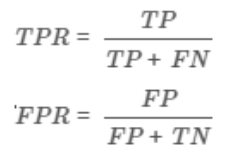

Un clasificador perfecto clasificaría correctamente todos los verdaderos positivos (VPR = 1,0) y no clasificaría ningún falso positivo (FPR = 0,0). El peor clasificador estaría principalmente adivinando aleatoriamente si una observación está en la clase positiva o negativa. Si trazáramos esto en la curva ROC para observar esto visualmente, se vería así:

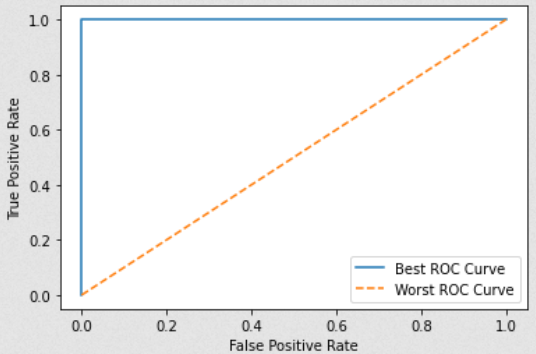



[Grafico interactivo curva ROC](http://www.navan.name/roc/)

# AUC

El Área Bajo la Curva ROC (AUC) es una manera de cuantificar qué tan bien nuestras clases están definidas. Cuanto más alta es la AUC, mejor será el clasificador para predecir la diferencia entre las clases.

In [1]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, RocCurveDisplay


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Data CodingDojo/1613253521__modifiedIris2Classes.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


**creacion de clasificador de regresion logistica**

In [5]:
# Split into X and y
X = df.drop(columns = 'target')
y = df['target']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
# Make an instance of the model
logreg = LogisticRegression(C = .001)
# Scaling logistic regression
scaler = StandardScaler()
# Create pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=0.001))])

**Calculen AUC y visualicen ROC**

In [6]:
# Calculate AUC for both training and testing sets
print(f'Training AUC: {roc_auc_score(y_train, logreg_pipe.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg_pipe.predict_proba(X_test)[:,1])}')


Training AUC: 0.9565527065527065
Testing AUC: 0.987012987012987


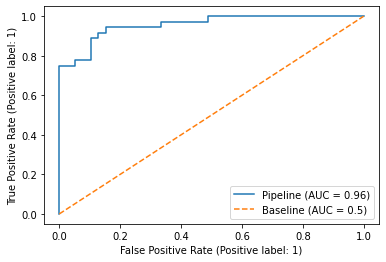

In [7]:
# Visualize the ROC curve
RocCurveDisplay.from_estimator(logreg_pipe, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();
